# kemans 기반 이상치 탐지
test 데이터 PCA 시각화 해보니 몇가지 군집이 있는 것으로 보여 kemans 모델을 통해 클러스터링을 진행하고 유클리디언 거리 계산을 통해 이상치 검출하고자 함

가설 : PCA 시각화상 여러 군집이 보임 해당 군집들 중심으로 부터 일정 범위 벗어난 데이터들은 이상치일 것

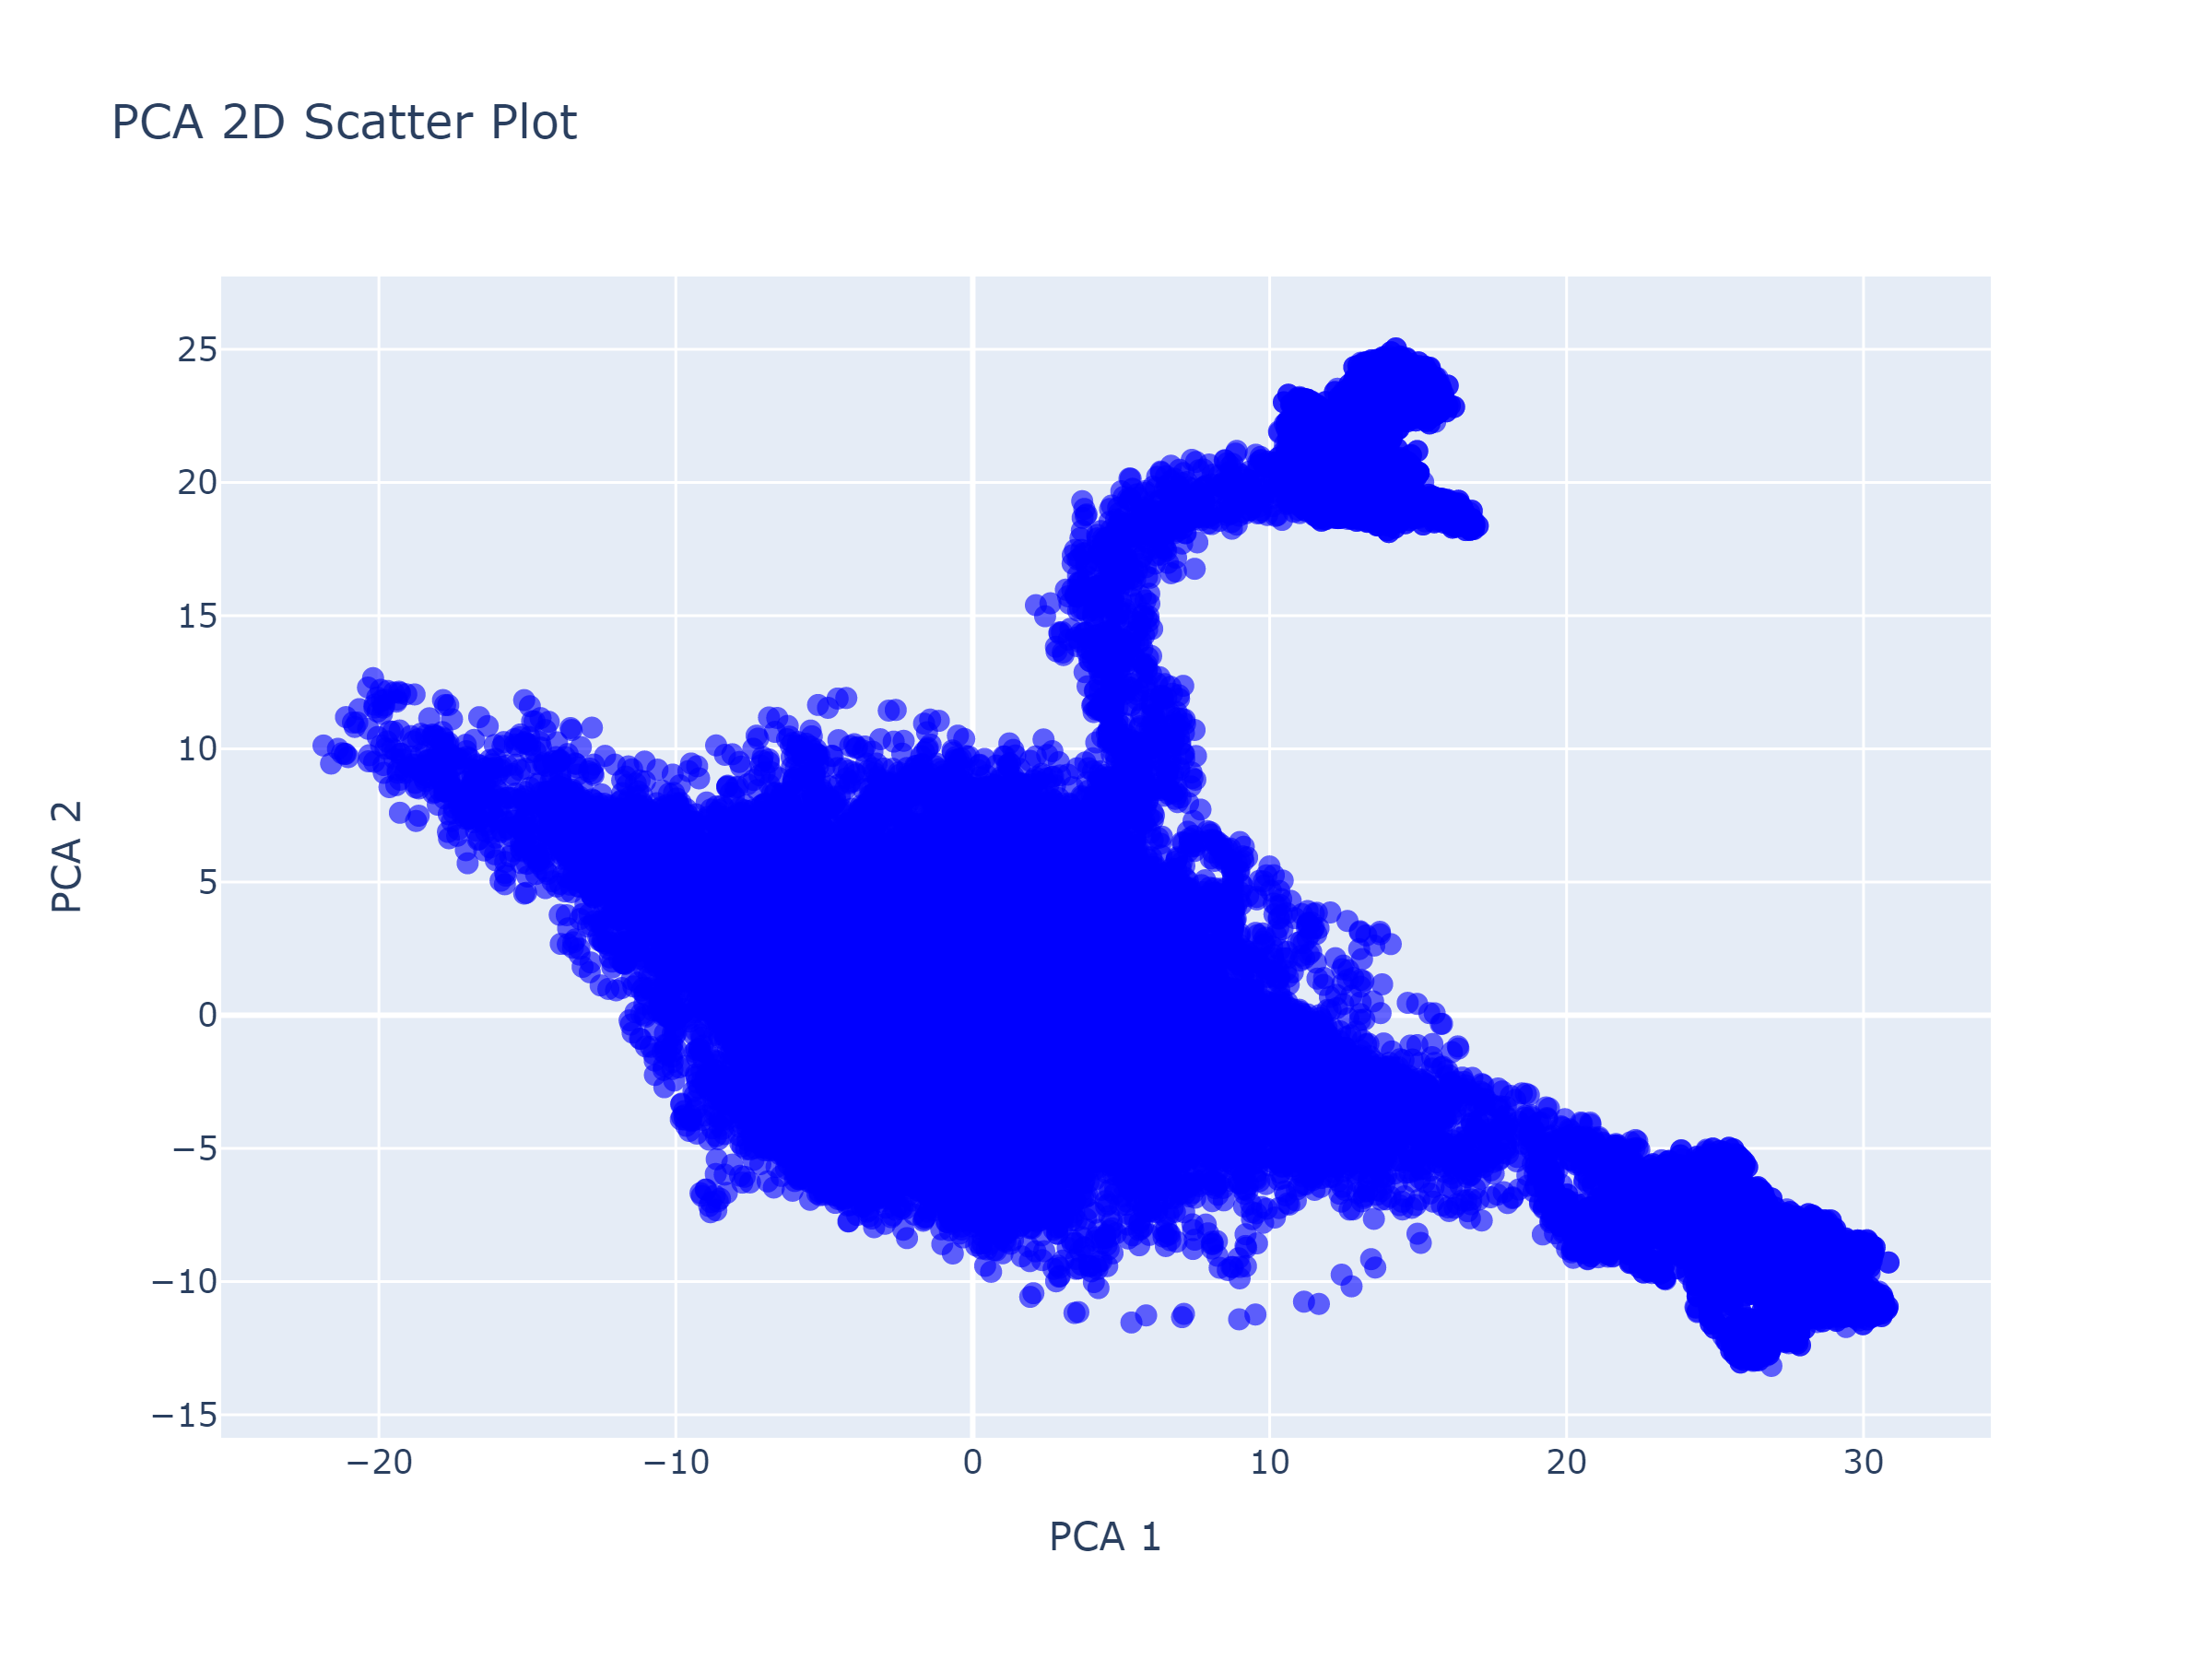

In [1]:
from typing import Union
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
import plotly.io as pio
from plotly.subplots import make_subplots
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# 데이터가 많아 plotly로 시각화시 인터렉션 활성화시 팅김 주의!!!! 특히 test데이터는 더더욱
config = {
    'staticPlot': True,  # 인터랙션 비활성화 (호버, 확대/축소 등)
}



In [2]:
def PCA_test(data, text, graph_on_off='off'):
    X = StandardScaler().fit_transform(data)
    X_PCA = PCA(n_components=2).fit_transform(X)
    df = pd.DataFrame(dict(
        PCA_1 = X_PCA[:, 0],  # PCA의 첫 번째 주성분
        PCA_2 = X_PCA[:, 1]   # PCA의 두 번째 주성분
    ))

    # Plotly Express를 사용하여 2D 산점도 시각화
    #x축은 PCA의 첫 번째 주성분, y축은 두 번째 주성분

    fig = go.Figure(data=go.Scatter(
        x=df["PCA_1"],
        y=df["PCA_2"],
        mode='markers',
        marker=dict(size=8, color='blue', opacity=0.6),
        hoverinfo='skip'  # 호버 정보 비활성화
    ))
        # 레이아웃 설정
    fig.update_layout(
        title="PCA 2D Scatter Plot",
        xaxis_title="PCA 1",
        yaxis_title="PCA 2",
        width=800, height=600
    )

    # 그래프 표시
    if graph_on_off == 'on':
        pio.show(fig, config=config)
    filename = f"PCA_graph_{text}.png"
    fig.write_image(filename, scale=3)

In [4]:
DATA_PATH = Path("C:/Users/lim/Desktop/upstage AI/AD_project/data")
train_data = pd.read_csv(DATA_PATH / "train.csv")
test_data = pd.read_csv(DATA_PATH / "test.csv")
def process_data(df) -> pd.DataFrame:
    numeric_cols = [
        'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
        'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
        'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
        'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
        'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
        'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
        'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
        'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8',
        'xmv_9', 'xmv_10', 'xmv_11'
    ]
    return df[numeric_cols]
train_a = process_data(train_data)
test_a = process_data(test_data)

df_all = pd.concat([train_a, test_a])

In [5]:
X = StandardScaler().fit_transform(df_all)
X_PCA = PCA(n_components=2).fit_transform(X)
df = pd.DataFrame(dict(
    PCA_1 = X_PCA[:, 0],  # PCA의 첫 번째 주성분
    PCA_2 = X_PCA[:, 1]   # PCA의 두 번째 주성분
))

In [7]:
# Inertia 값을 저장할 리스트 초기화
inertia = []

# 1부터 10까지의 k 값에 대해 KMeans 클러스터링 수행 및 inertia 계산
for k in range(1, 11):
    k_means_k = KMeans(
        n_clusters=k,    # 클러스터 수 설정
        init="random",   # 초기 중심점을 무작위로 선택
        n_init="auto"    # k-means 알고리즘 반복 실행 횟수 설정
    ).fit(X_PCA)         # PCA로 축소된 데이터에 모델 적용

    # 각 k에 대한 Inertia 값 계산 및 추가
    inertia.append(k_means_k.inertia_)

# Inertia 값 출력
print(inertia)


[21704670.945908476, 10397569.138972925, 3602131.2831867617, 2897806.5743825855, 2349286.8278125525, 1827635.4106531346, 1457669.267372552, 1259841.518178758, 1120298.271663906, 1010890.2671814477]


In [8]:
# Inertia 값과 클러스터 수 k를 DataFrame으로 변환
df_inertia = pd.DataFrame(dict(
    k = [x for x in range(1, 11)],  # 클러스터 수 k (1부터 10까지)
    inertia = inertia,  # 각 k에 대한 Inertia 값
))

# Inertia 값에 대한 꺾은 선 그래프 생성
fig_inertia = px.line(
    df_inertia,
    x = "k",         # x축은 클러스터 수 k
    y = "inertia"    # y축은 Inertia 값
)

# 그래프 표시
fig_inertia.show()


In [9]:
# KMeans 모델 정의

model = KMeans(
    n_clusters = 3,   # 클러스터 수
    init = "random",  # Centroid 초기화 방법. "random" -> 랜덤하게 centroid 선택
    n_init = "auto"   # 랜덤한 centroid seed를 이용하여 k-means 알고리즘을 실행하는 횟수. 가장 나은 결과가 선택됨. (lowest inertia)
)

In [10]:
# k-menas clustering 실행
kmeans = model.fit(X_PCA)

In [11]:
def distance(p1, p2):
    # p1, p2 -> numpy array
    # 유클리디언 거리 계산: 두 점 사이의 각 차원의 차이를 제곱한 후, 이들의 합의 제곱근을 반환
    return np.sqrt(np.sum((p1 - p2) ** 2))


In [12]:
# 각 데이터 포인트와 해당 클러스터 중심점 간의 거리 계산
distance_to_centroid = np.array([distance(X_PCA[i], kmeans.cluster_centers_[kmeans.labels_[i]]) for i in range(len(X_PCA))])

# 각 클러스터에 대한 75번째 백분위수 계산
percentile_75s = [np.quantile(distance_to_centroid[kmeans.labels_ == i], 0.75) for i in range(kmeans.n_clusters)]

print("75th percentiles for each cluster:", percentile_75s)

# 이상치로 간주되는 데이터 포인트의 인덱스 계산
anomaly = np.array([i for i in range(len(X_PCA)) if distance_to_centroid[i] > percentile_75s[kmeans.labels_[i]]])



75th percentiles for each cluster: [4.4587860253911975, 3.1864525425462302, 1.1285469382776037]


In [13]:
# 각 데이터 포인트가 해당 클러스터의 75번째 백분위수 거리 임계값을 초과하는지 여부를 기준으로 이상치 탐지
anomaly_indices = np.array([
    i for i in range(len(X_PCA))  # 전체 데이터 포인트에 대해 반복
    if distance_to_centroid[i] > percentile_75s[kmeans.labels_[i]]  # 해당 데이터 포인트의 거리가 해당 클러스터의 75번째 백분위수를 초과하는 경우
])

print("Anomalies indices:", anomaly_indices)


Anomalies indices: [    30     58     59 ... 959711 959712 959713]


In [16]:
def anomaly_detection_k_means_2d(data, K, threshold):
    # 유클리디언 거리 계산 함수
    def distance(p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))

    # KMeans 클러스터링 모델 생성 및 학습
    kmeans = KMeans(
        n_clusters=K,    # 클러스터 수
        init="random",   # 중심점 초기화 방법
        n_init="auto"    # 초기화 실행 횟수
    ).fit(data)

    # 각 데이터 포인트와 해당 클러스터 중심점 간의 거리 계산
    distances = np.array([distance(data[i], kmeans.cluster_centers_[kmeans.labels_[i]]) for i in range(len(data))])

    # 각 클러스터의 임계 백분위수 계산
    percentiles = [np.percentile(distances[kmeans.labels_ == i], threshold) for i in range(K)]

    # 임계값을 초과하는 데이터 포인트를 이상치로 간주
    anomaly = np.array([i for i in range(len(data)) if distances[i] > percentiles[kmeans.labels_[i]]])

    # 원본 데이터에 새로운 'anomaly' 컬럼 추가
    data_with_anomaly = pd.DataFrame(data.copy())  # DataFrame으로 변환
    data_with_anomaly['anomaly'] = 0  # 모든 행에 0으로 초기화
    data_with_anomaly.loc[anomaly, 'anomaly'] = 1  # 이상치 인덱스에 1 할당

    return kmeans, anomaly, data_with_anomaly

# 예시 사용
data = X_PCA  # 예시 2D 데이터 생성
K = 3  # 클러스터 수
threshold = 90  # 임계 백분위수
kmeans, anomaly, data_with_anomaly = anomaly_detection_k_means_2d(data, K, threshold)

# 결과 확인
print(data_with_anomaly.head())  # 데이터프레임 출력

          0         1  anomaly
0 -0.517279 -0.006850        0
1 -0.307313 -0.456725        0
2 -0.570677 -0.026086        0
3 -0.604412 -0.344167        0
4  0.228299  0.073908        0


In [21]:
# 데이터 길이로 합쳤던 데이터 분할
train_with_anomaly = data_with_anomaly.iloc[:len(train_a)].reset_index(drop=True)
test_with_anomaly = data_with_anomaly.iloc[len(train_a):].reset_index(drop=True)

In [22]:
test_with_anomaly.drop([0,1], axis=1, inplace=True)
test_with_anomaly.rename(columns={'anomaly':'faultNumber'}, inplace=True)

In [23]:
test_with_anomaly

,faultNumber
0,0
1,0
2,0
3,0
4,0
...,...
710395,0
710396,0
710397,0
710398,0


In [25]:
# 제출 데이터 출력
test_with_anomaly.to_csv("output.csv", index=True)

In [40]:
def plot_pca_with_clusters(df, kmeans, X_PCA, anomaly, graph_on_off='off'):
    # 산점도 (PCA 주성분과 클러스터 결과)
    fig_anomaly = go.Figure()

    # 클러스터링 결과를 산점도로 표시
    fig_anomaly.add_trace(go.Scatter(
        x=df["PCA_1"],
        y=df["PCA_2"],
        mode='markers',
        marker=dict(
            size=8,
            color=kmeans.labels_,  # 클러스터 라벨에 따른 색상
            opacity=0.6,
            colorscale='Viridis',  # 색상 스케일
            showscale=True          # 색상바 표시
        ),
        name="Cluster Points"
    ))

    # 클러스터 중심점 표시 (빨간색 십자가 마커)
    fig_anomaly.add_trace(go.Scatter(
        x=kmeans.cluster_centers_[:, 0],
        y=kmeans.cluster_centers_[:, 1],
        mode='markers',
        marker=dict(
            size=12,
            color='red',
            symbol='cross'
        ),
        name="Centroids"
    ))

    # # 이상치 표시 (주황색 별 모양 마커)
    # fig_anomaly.add_trace(go.Scatter(
    #     x=X_PCA[anomaly, 0],
    #     y=X_PCA[anomaly, 1],
    #     mode='markers',
    #     marker=dict(
    #         size=10,
    #         color='orange',
    #         symbol='star'
    #     ),
    #     name="Anomalies"
    # ))

    # 레이아웃 설정
    fig_anomaly.update_layout(
        title="PCA Scatter Plot with Clustering",
        xaxis_title="PCA 1",
        yaxis_title="PCA 2",
        width=800,
        height=600
    )

    if graph_on_off == 'on':
        pio.show(fig_anomaly, config=config)
    filename = f"PCA_graph_kmeans.png"
    fig_anomaly.write_image(filename, scale=3)

In [41]:
plot_pca_with_clusters(df, kmeans, X_PCA, anomaly)

위 그림

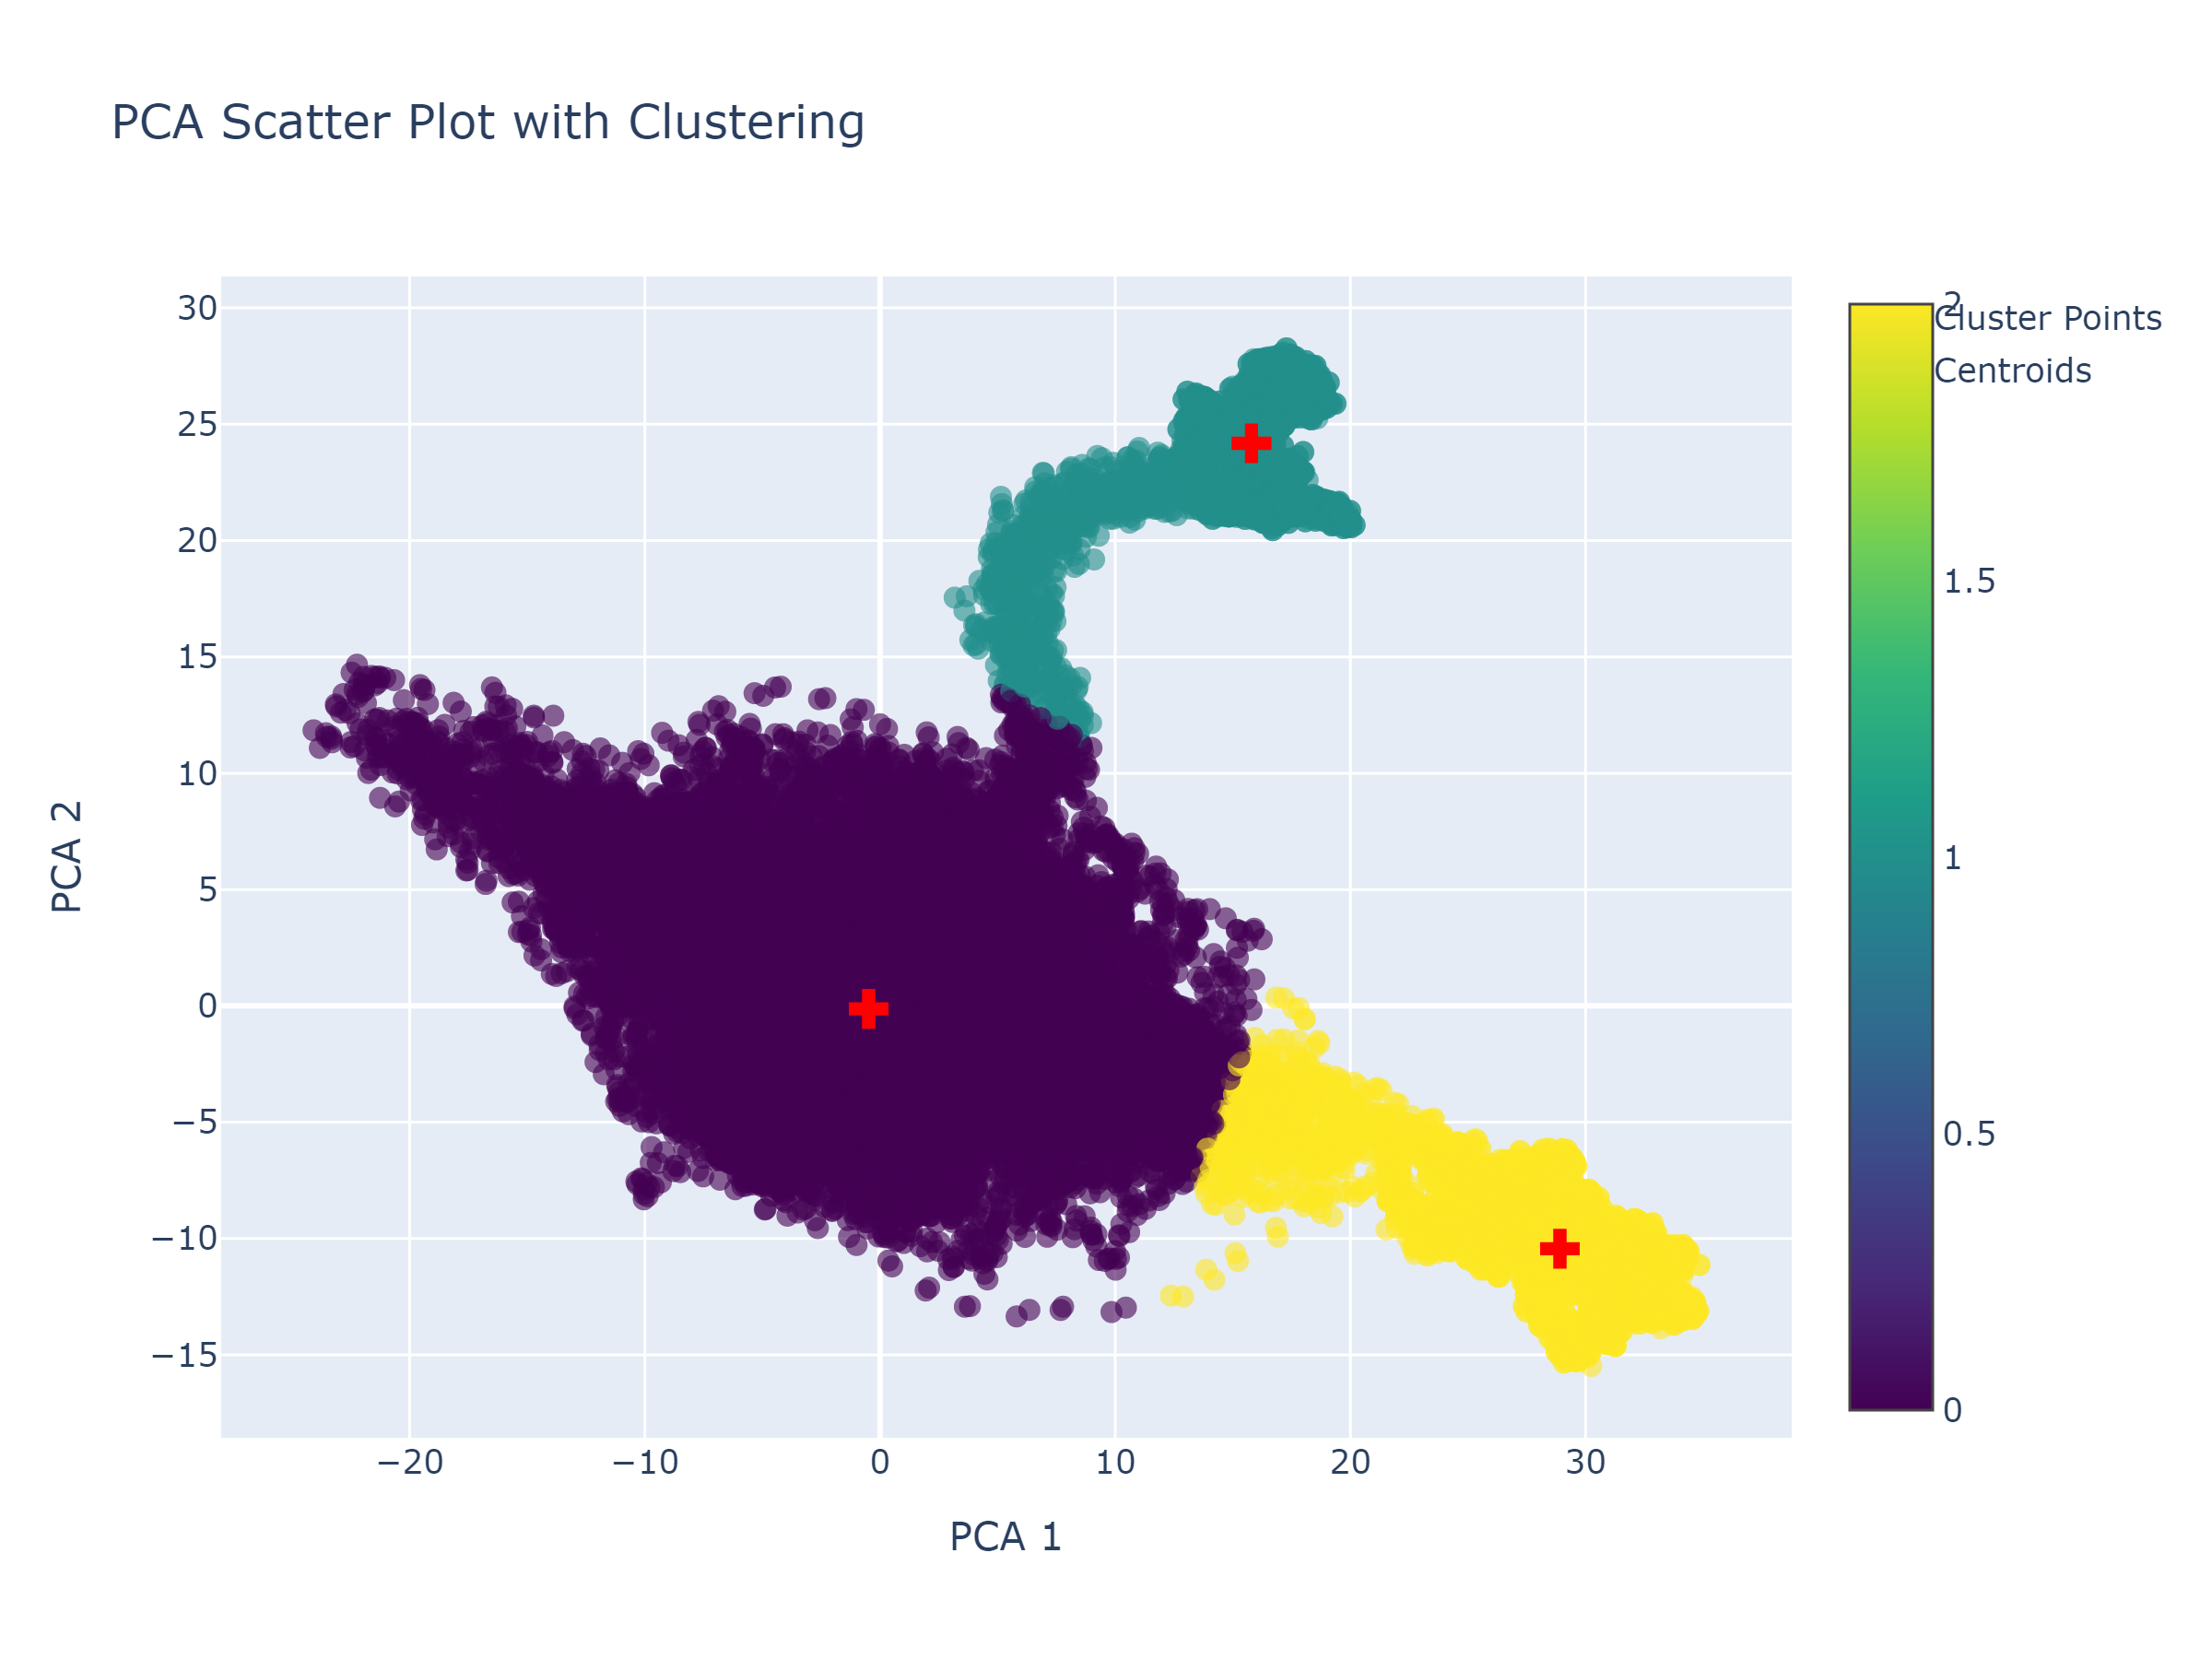

oneclassSVM 보다 떨어지는 성능을 보임

원인 추측 : 군집이 원형이 아님, 분류된 군집 자체가 이상치일 가능성

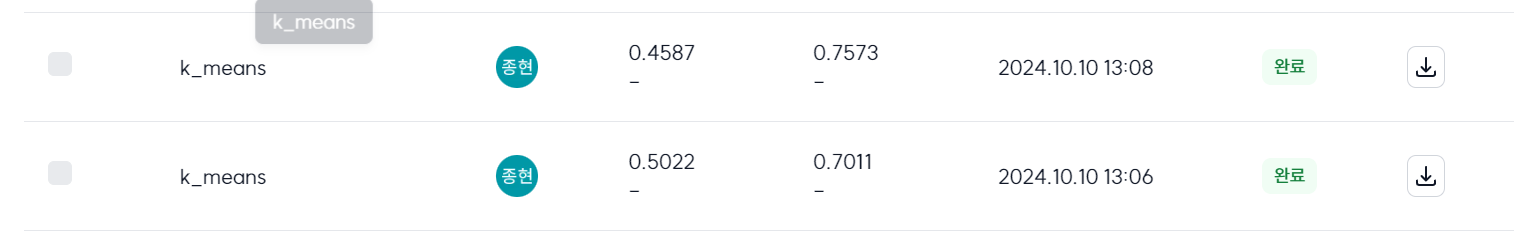